In [1]:
import pandas as pd
import numpy as np

import glob
import xarray as xr

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing 

from sklearn.linear_model import LinearRegression

from sktime.transformations.series.detrend import Detrender
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.utils.plotting import plot_series

import seaborn as sns

from standard_precip.spi import SPI
from standard_precip.utils import plot_index

import geopandas as gpd

from shapely.geometry import Point

from scipy.interpolate import Rbf

In [2]:
#load df
feature_df = pd.read_csv('../data/almost_final_final_df.csv', header=0, index_col = 0)
#feature_df.head(5)

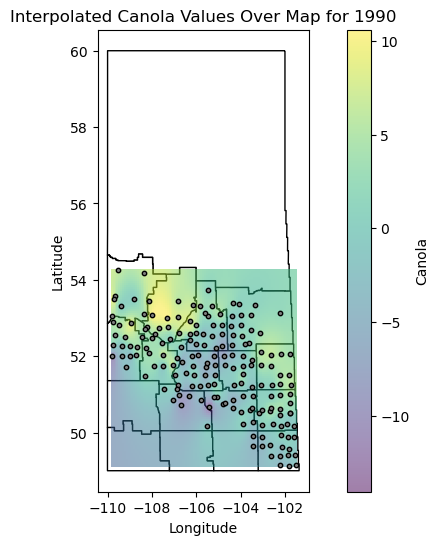

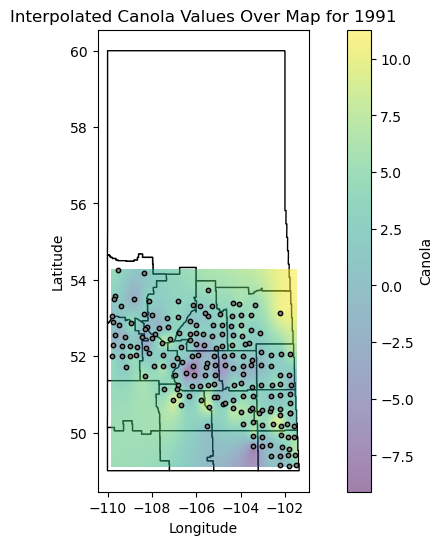

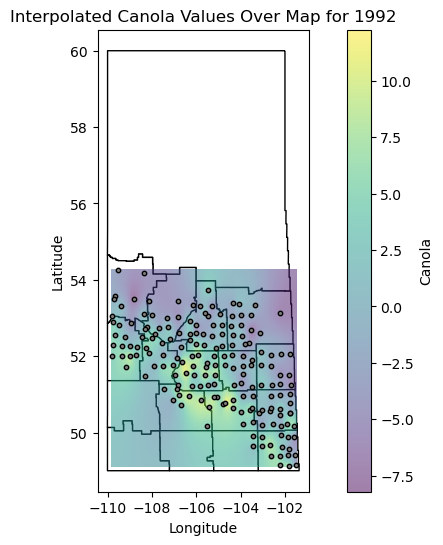

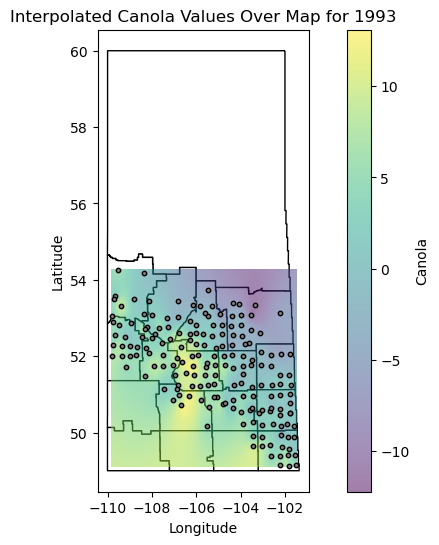

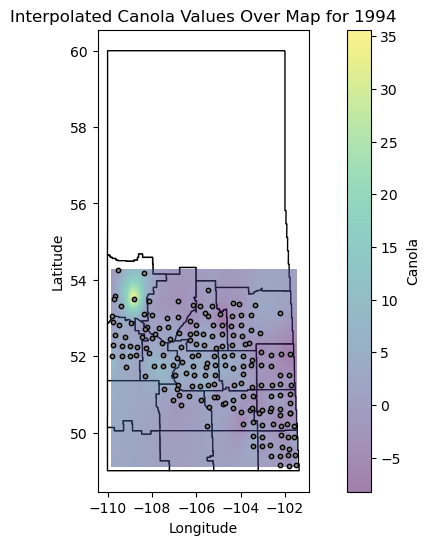

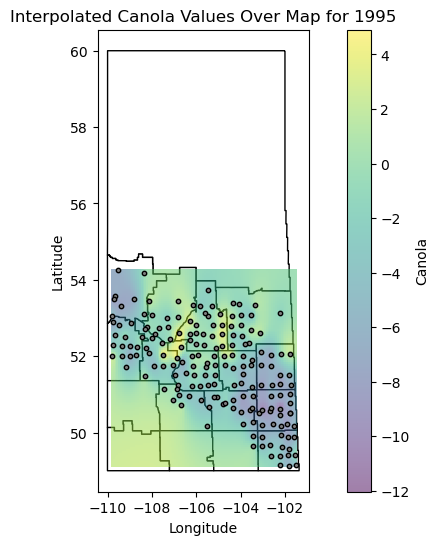

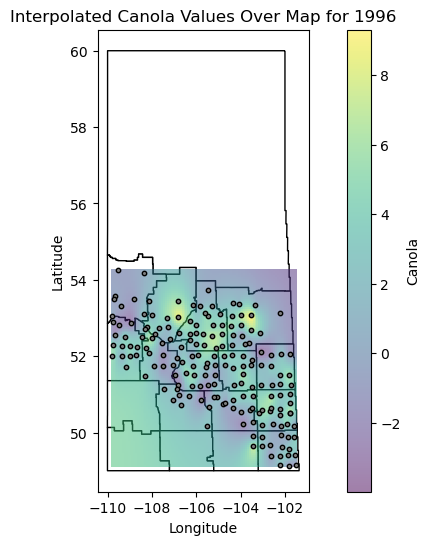

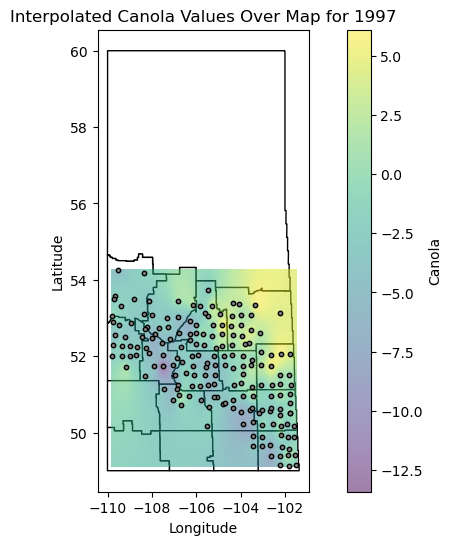

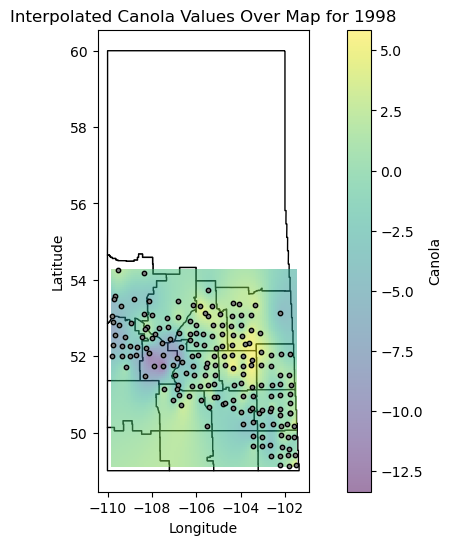

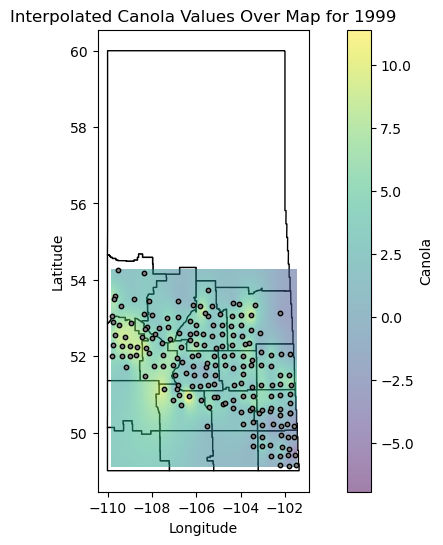

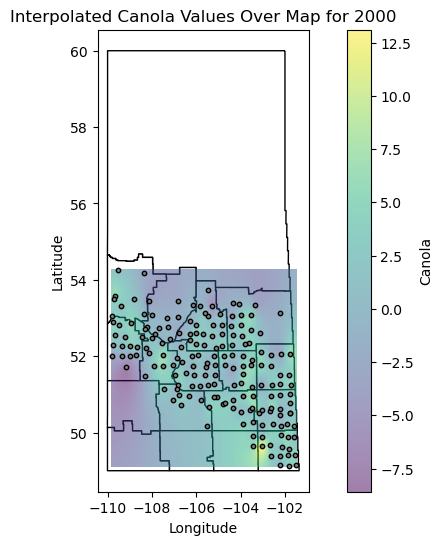

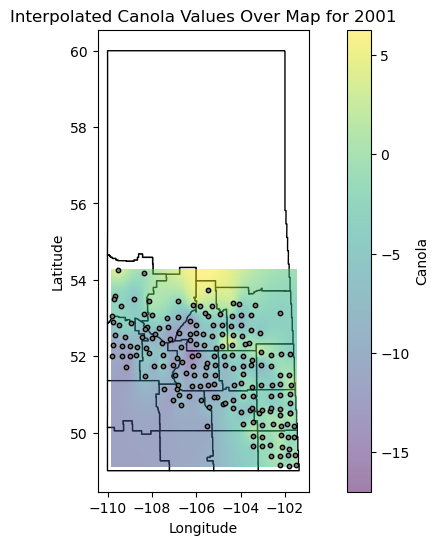

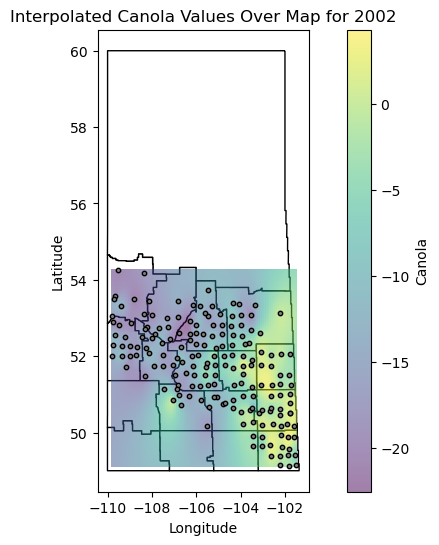

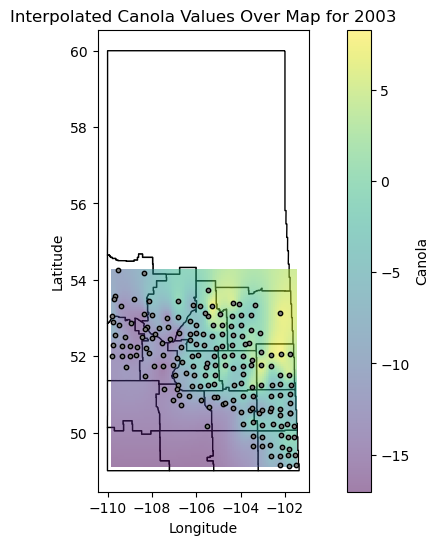

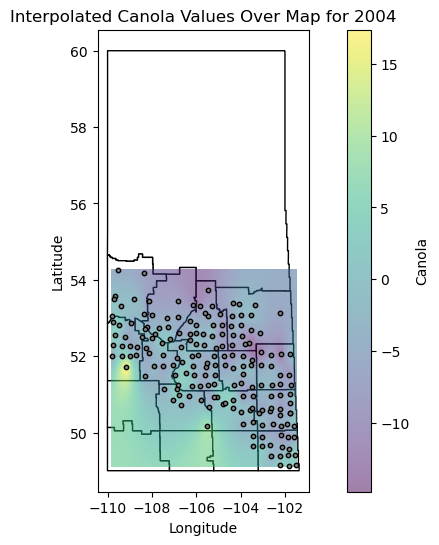

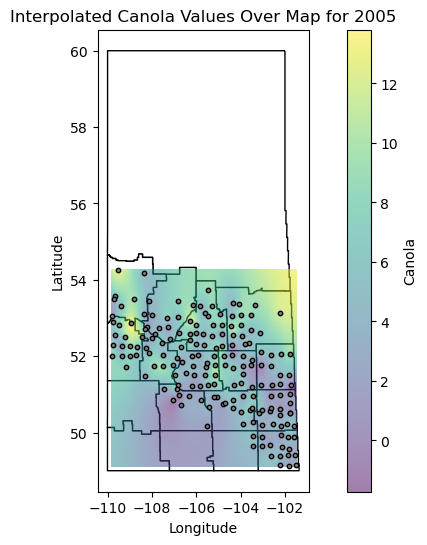

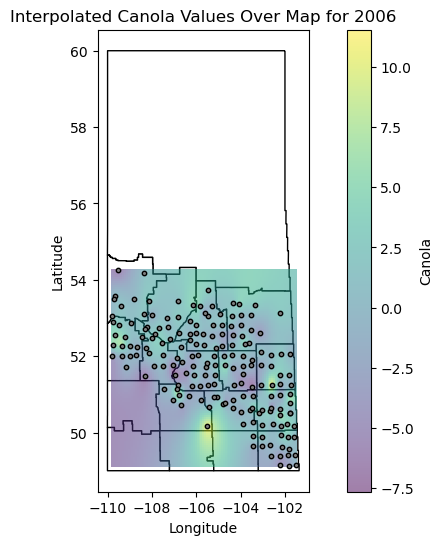

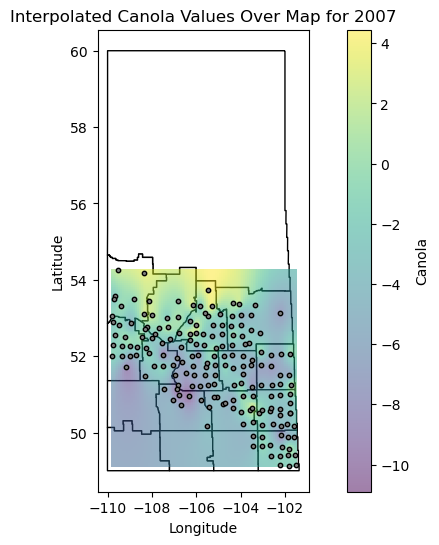

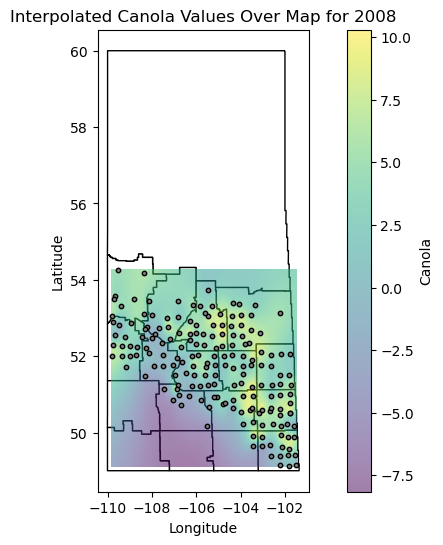

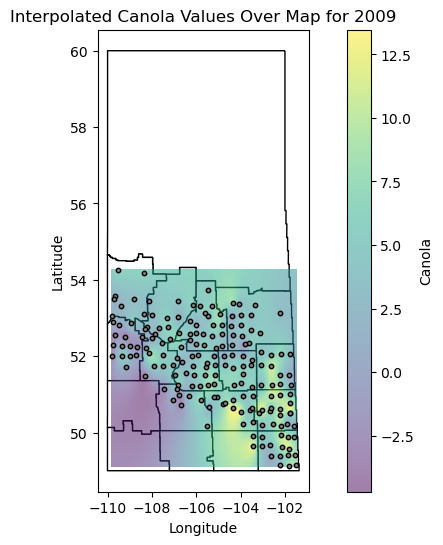

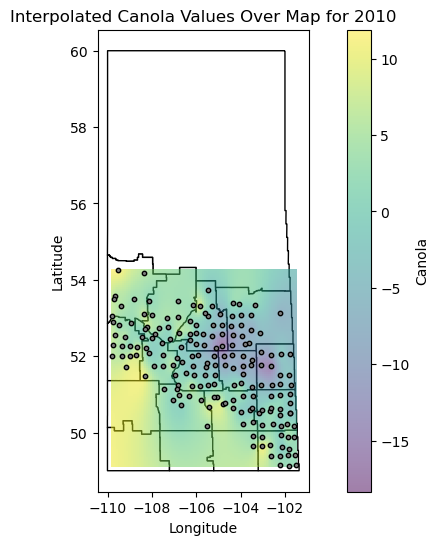

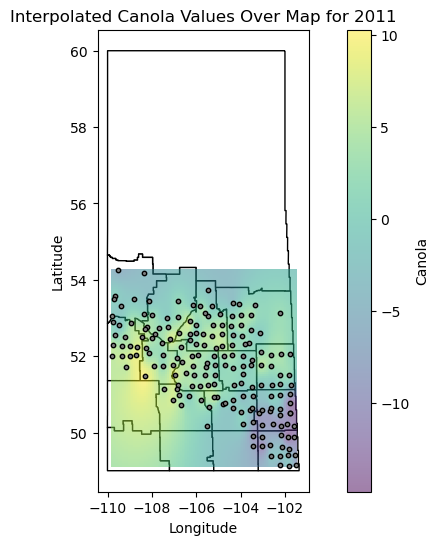

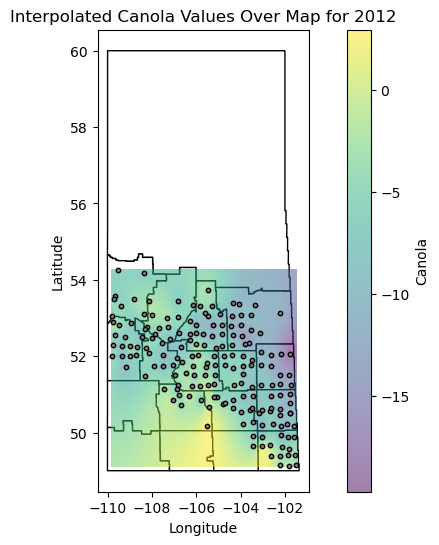

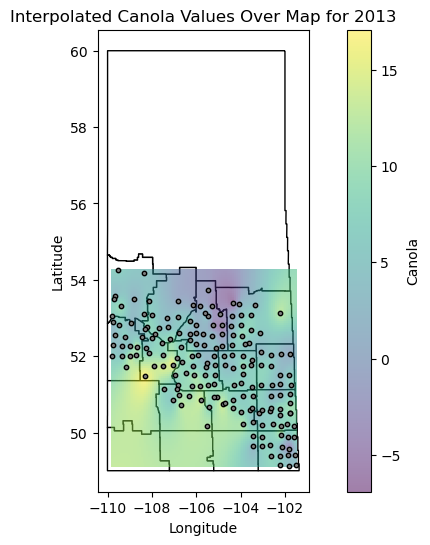

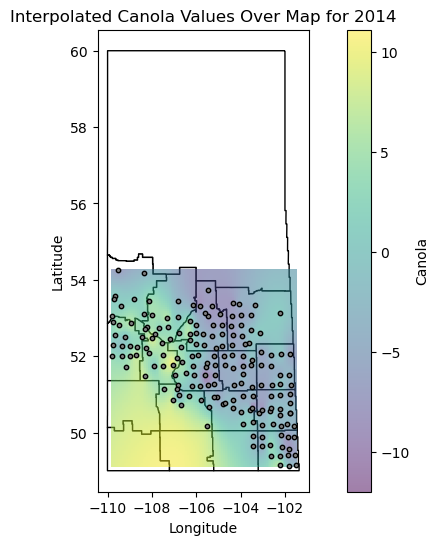

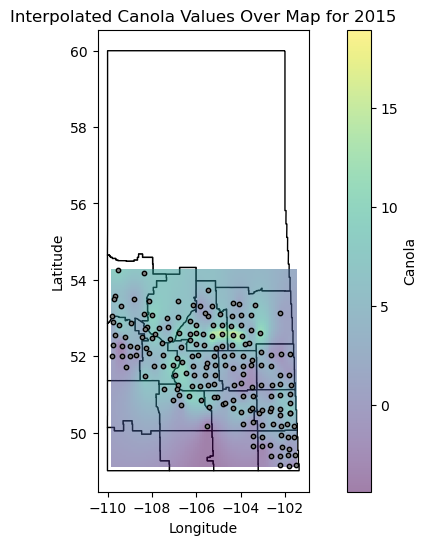

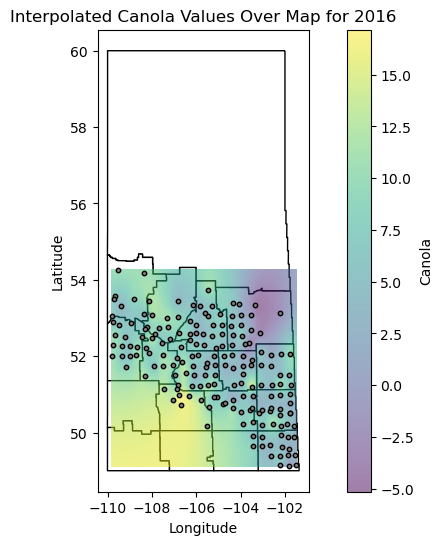

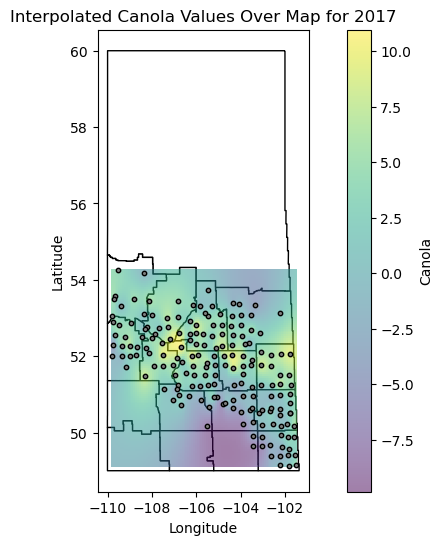

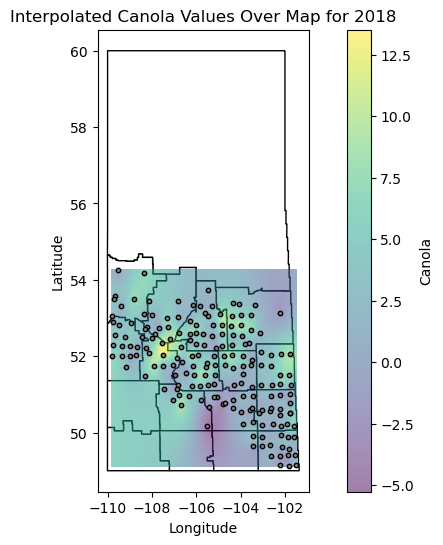

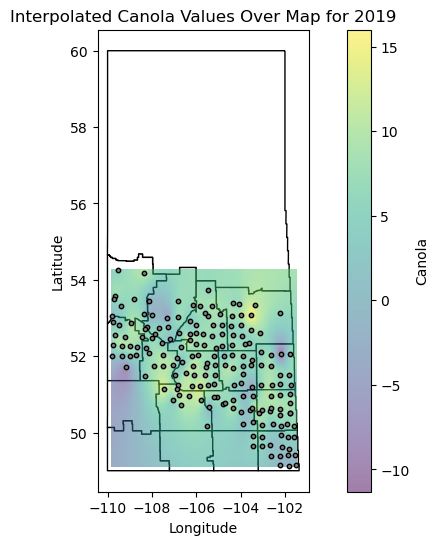

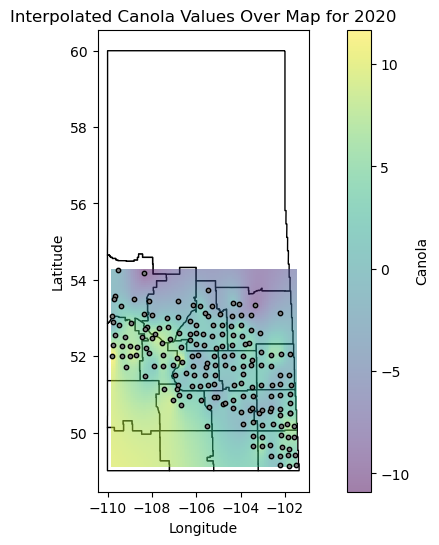

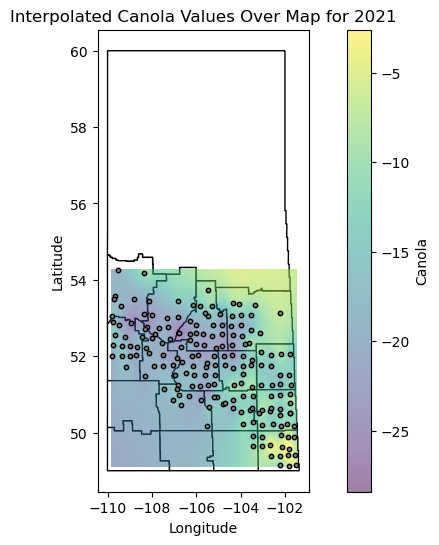

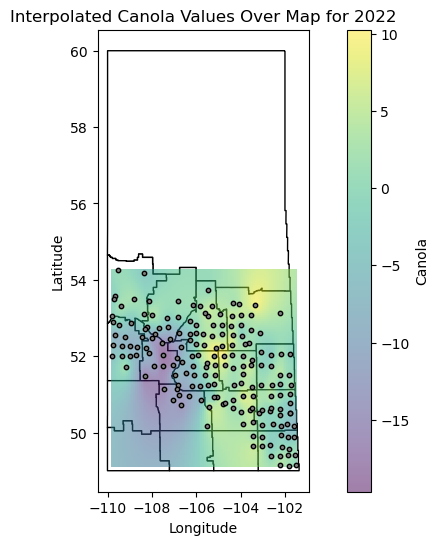

In [3]:
# plot the Canola yield over all districts for every year  

# Load the shapefile
map_saskatchewan = gpd.read_file("C:/Users/maris/python_notebooks/XAI_TS_Forecasting/data/Saskatchewan_map.shp")

# Iterate over each year in feature_df
for year in feature_df.index.unique():
    # Filter the DataFrame for the current year
    current_year_df = feature_df.loc[year]

    # Create the GeoDataFrame for the current year
    geometry = [Point(xy) for xy in zip(current_year_df["Longitude"], current_year_df["Latitude"])]
    geo_df = gpd.GeoDataFrame(current_year_df, geometry=geometry)

    # Define the grid for interpolation
    lon_min, lon_max = geo_df['Longitude'].min(), geo_df['Longitude'].max()
    lat_min, lat_max = geo_df['Latitude'].min(), geo_df['Latitude'].max()
    lon, lat = np.meshgrid(np.linspace(lon_min, lon_max, 100),
                           np.linspace(lat_min, lat_max, 100))

    # Perform RBF interpolation
    rbf = Rbf(geo_df['Longitude'], geo_df['Latitude'], geo_df['Canola'], function='linear')
    di = rbf(lon, lat)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    map_saskatchewan.plot(ax=ax, color='white', edgecolor='black')
    c = ax.pcolormesh(lon, lat, di, shading='auto', cmap='viridis', alpha=0.5)
    scatter = ax.scatter(geo_df['Longitude'], geo_df['Latitude'], color='gray', edgecolor='black', s=10, label='Original Points')

    # Add colorbar
    fig.colorbar(c, ax=ax, label='Canola')

    # Customize the plot for the current year
    plt.title(f"Interpolated Canola Values Over Map for {year}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # Show plot
    plt.show()


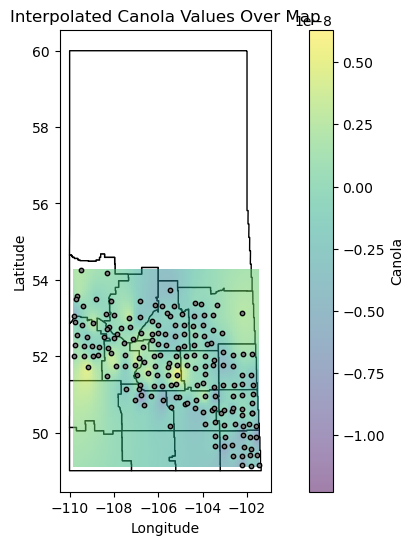

In [4]:
# sum over all years 

feature_df_sum = feature_df.groupby('region').agg({
    'Canola': 'sum',  # Sum the values of the 'Canola' column
    'Latitude': 'first',  # Take the first 'Latitude' value
    'Longitude': 'first'  # Take the first 'Longitude' value
})

feature_df_sum

geometry = [Point(xy) for xy in zip(feature_df_sum["Longitude"], feature_df_sum["Latitude"])]
geo_df = gpd.GeoDataFrame(feature_df_sum, geometry=geometry)

# Load the shapefile
map_saskatchewan = gpd.read_file("C:/Users/maris/python_notebooks/XAI_TS_Forecasting/data/Saskatchewan_map.shp")


lon_min, lon_max = geo_df['Longitude'].min(), geo_df['Longitude'].max()
lat_min, lat_max = geo_df['Latitude'].min(), geo_df['Latitude'].max()
lon, lat = np.meshgrid(np.linspace(lon_min, lon_max, 100),
                       np.linspace(lat_min, lat_max, 100))

# Perform RBF interpolation
rbf = Rbf(geo_df['Longitude'], geo_df['Latitude'], geo_df['Canola'], function='linear')
di = rbf(lon, lat)


# Plot the shapefile as base
fig, ax = plt.subplots(figsize=(10, 6))
map_saskatchewan.plot(ax=ax, color='white', edgecolor='black')

# Plot the interpolated 'Canola' values
c = ax.pcolormesh(lon, lat, di, shading='auto', cmap='viridis', alpha=0.5)

# Add the original points over the interpolated surface
scatter = ax.scatter(geo_df['Longitude'], geo_df['Latitude'], color='gray', edgecolor='black', s=10, label='Original Points')  # s=10 makes the points smaller


# Add colorbar
fig.colorbar(c, ax=ax, label='Canola')

# Customize the plot
plt.title("Interpolated Canola Values Over Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show plot
plt.show()

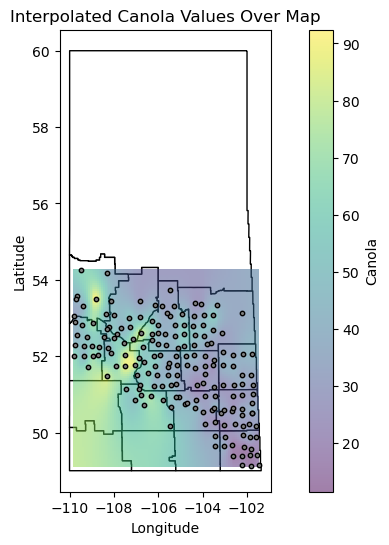

In [5]:
# variance over all years 

feature_df_sum = feature_df.groupby('region').agg({
    'Canola': 'var',  # Sum the values of the 'Canola' column
    'Latitude': 'first',  # Take the first 'Latitude' value
    'Longitude': 'first'  # Take the first 'Longitude' value
})

feature_df_sum

geometry = [Point(xy) for xy in zip(feature_df_sum["Longitude"], feature_df_sum["Latitude"])]
geo_df = gpd.GeoDataFrame(feature_df_sum, geometry=geometry)

# Load the shapefile
map_saskatchewan = gpd.read_file("C:/Users/maris/python_notebooks/XAI_TS_Forecasting/data/Saskatchewan_map.shp")


lon_min, lon_max = geo_df['Longitude'].min(), geo_df['Longitude'].max()
lat_min, lat_max = geo_df['Latitude'].min(), geo_df['Latitude'].max()
lon, lat = np.meshgrid(np.linspace(lon_min, lon_max, 100),
                       np.linspace(lat_min, lat_max, 100))

# Perform RBF interpolation
rbf = Rbf(geo_df['Longitude'], geo_df['Latitude'], geo_df['Canola'], function='linear')
di = rbf(lon, lat)


# Plot the shapefile as base
fig, ax = plt.subplots(figsize=(10, 6))
map_saskatchewan.plot(ax=ax, color='white', edgecolor='black')

# Plot the interpolated 'Canola' values
c = ax.pcolormesh(lon, lat, di, shading='auto', cmap='viridis', alpha=0.5)

# Add the original points over the interpolated surface
scatter = ax.scatter(geo_df['Longitude'], geo_df['Latitude'], color='gray', edgecolor='black', s=10, label='Original Points')  # s=10 makes the points smaller


# Add colorbar
fig.colorbar(c, ax=ax, label='Canola')

# Customize the plot
plt.title("Interpolated Canola Values Over Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show plot
plt.show()